<a href="https://colab.research.google.com/github/BooEazy/Project_DataScience/blob/main/Latihan/Tugas_DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.0 Import Library dan Data**

In [ ]:
# Import Data Manipulation libraries
import pandas as pd
import numpy as np

# Import Visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

**Tugas_DataVisualization**
Diberikan dataset terkait cashflow seorang data scientist dengan kolom sebagai berikut:

o Year tahun transaksi tersebut dilakukan

o Month bulan transaksi tersebut dilakukan

o Year-Month tahun-bulan transaksi tersebut dilakukan

o Type tipe transaksi tersebut

o Details detail transaksi yang dilakukan

o Amount nominal transaksi tersebut

- Lakukan analisis dan buat visualisasi data menggunakan python (matplotlib/seaborn) dari
berbagai variable yang tersedia.
- Jelaskan informasi dan insight apa saja yang bisa disampaikan dari hasil visualisasi data.
- Tambahkan kelompok variable lain jika dirasa ada insight yang menarik.

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Dataset/cashflow.csv", sep=';')
data.head()

,Year,Month,Year-Month,Type,Details,Amount
0,2021,9,2021-9,Income,Salary,Rp18.000.000
1,2021,9,2021-9,Expense,Food & Beverage,Rp467.200
2,2021,9,2021-9,Expense,Fitness,Rp173.000
3,2021,9,2021-9,Expense,Transportation,Rp14.000
4,2021,10,2021-10,Income,Salary,Rp12.000.000


In [ ]:
data.describe()

In [ ]:
data.shape

(285, 6)

# **1.1 Histogram**

In [ ]:
# Cek tipe data pada kolom 'Amount'
print(data['Amount'].dtype)

object


In [ ]:
# Mengonversi kolom Amount ke tipe numerik
data['Amount'] = pd.to_numeric(data['Amount'].str.replace('Rp', '').replace(',', ''), errors='coerce')

# Cek tipe data setelah konversi
print(data['Amount'].dtype)

float64


In [ ]:
data['Amount'].value_counts()

46.500     13
416.250     6
50.000      5
93.000      3
25.000      3
           ..
27.737      1
42.000      1
116.483     1
280.000     1
53.795      1
Name: Amount, Length: 141, dtype: int64

In [ ]:
# Mencetak statistik deskriptif dari kolom 'Amount'
print(data['Amount'].describe())

count    183.000000
mean     258.117279
std      239.371552
min        3.500000
25%       50.000000
50%      200.000000
75%      402.500000
max      970.495000
Name: Amount, dtype: float64


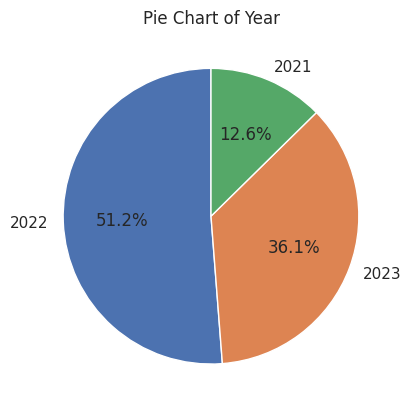

In [ ]:
# Hitung frekuensi setiap kategori dalam kolom 'Year'
type_counts = data['Year'].value_counts()

# Plot pie chart
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Year')
plt.show()

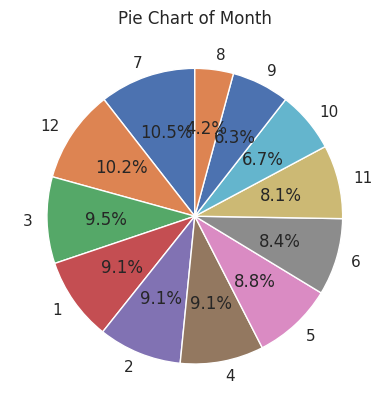

In [ ]:
# Hitung frekuensi setiap kategori dalam kolom 'Month'
type_counts = data['Month'].value_counts()

# Plot pie chart
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Month')
plt.show()

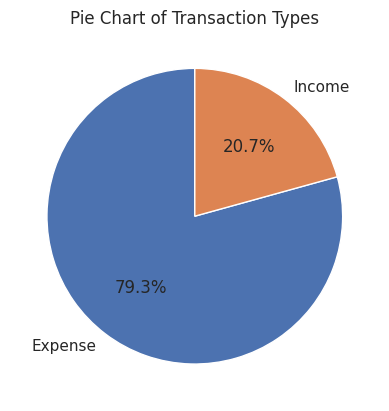

In [ ]:
# Hitung frekuensi setiap kategori dalam kolom 'Type'
type_counts = data['Type'].value_counts()

# Plot pie chart
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Transaction Types')
plt.show()

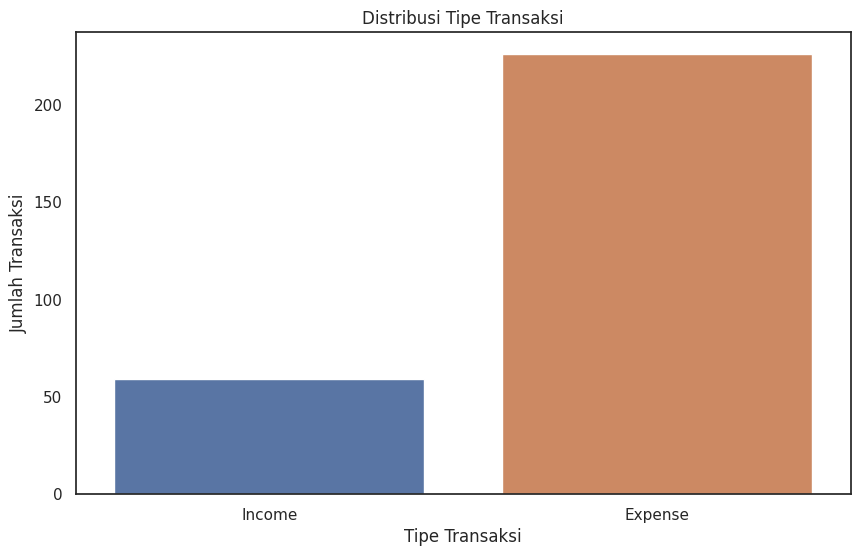

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Type', data=data)
plt.title('Distribusi Tipe Transaksi')
plt.xlabel('Tipe Transaksi')
plt.ylabel('Jumlah Transaksi')
plt.show()

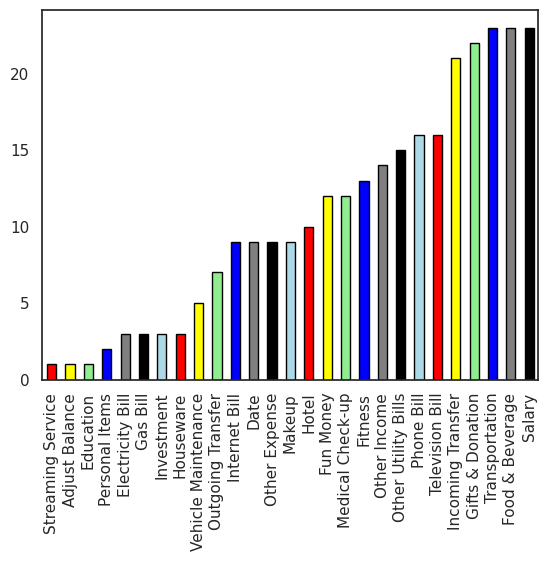

In [ ]:
# Hitung frekuensi setiap kategori dalam kolom 'Details'
type_counts = data['Details'].value_counts()

# Plot pie chart
sns.set_theme(style="white")
data['Details'].value_counts().sort_values().plot.bar(color= ['red', 'yellow', 'lightgreen', 'blue', 'grey', 'black', 'lightblue'], edgecolor = 'black')
plt.show()

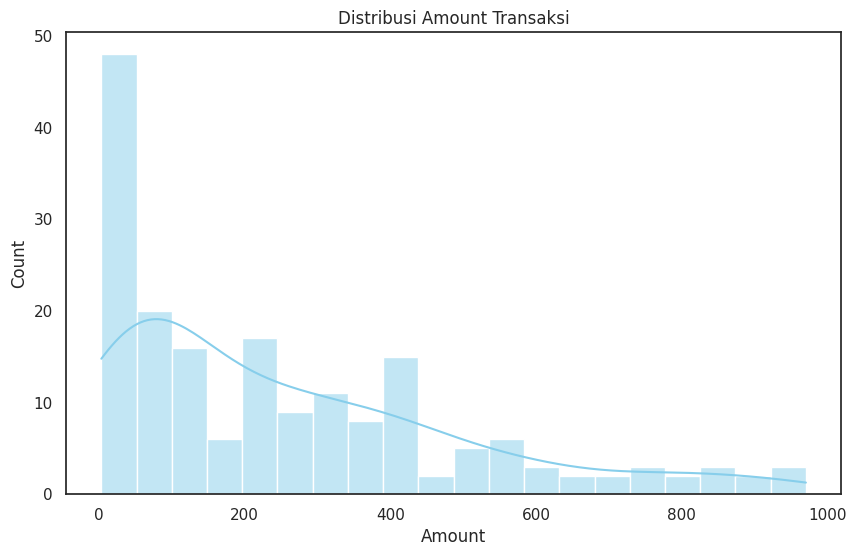

In [ ]:
# Visualisasi Distribusi Amount
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'], bins=20, kde=True, color='skyblue')
plt.title('Distribusi Amount Transaksi')
plt.show()

In [ ]:
data['Year'].value_counts()

2022    146
2023    103
2021     36
Name: Year, dtype: int64

In [ ]:
# Ubah tipe data kolom Year menjadi numerik
data['Year'] = data['Year'].astype('int64')

# Cetak data frame
print(data)

     Year  Month Year-Month     Type           Details   Amount
0    2021      9     2021-9   Income            Salary      NaN
1    2021      9     2021-9  Expense   Food & Beverage  467.200
2    2021      9     2021-9  Expense           Fitness  173.000
3    2021      9     2021-9  Expense    Transportation   14.000
4    2021     10    2021-10   Income            Salary      NaN
..    ...    ...        ...      ...               ...      ...
280  2023      7     2023-7  Expense            Makeup  222.500
281  2023      7     2023-7  Expense   Television Bill   93.000
282  2023      7     2023-7  Expense         Fun Money   53.795
283  2023      7     2023-7  Expense          Gas Bill   34.000
284  2023      7     2023-7  Expense  Medical Check-up    5.000

[285 rows x 6 columns]


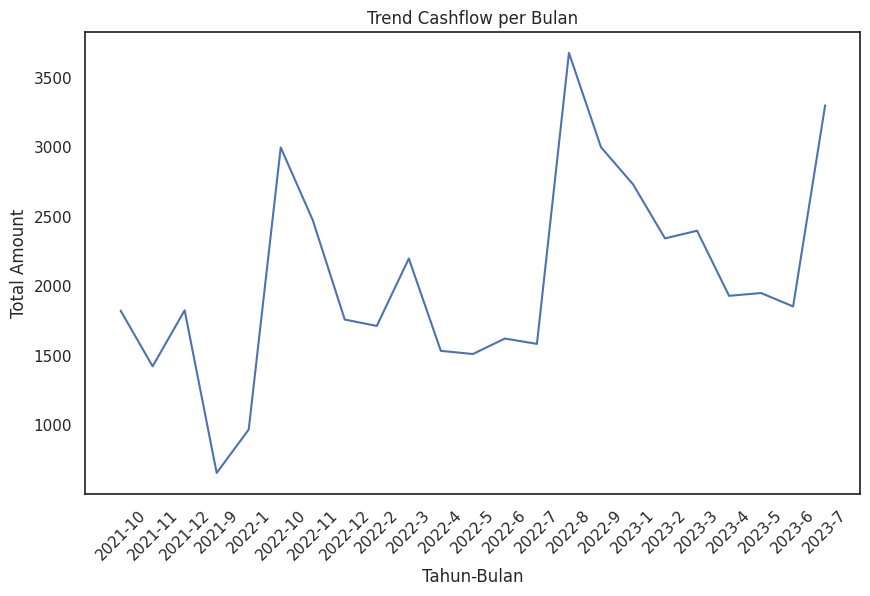

In [ ]:
# Gabungkan kolom 'year' dan 'month' menjadi 'Year-Month'
data['Year-Month'] = data['Year'].astype(str) + '-' + data['Month'].astype(str)

# Visualisasi Trend Cashflow per Bulan
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year-Month', y='Amount', data=data.groupby('Year-Month')['Amount'].sum().reset_index())
plt.title('Trend Cashflow per Bulan')
plt.xlabel('Tahun-Bulan')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

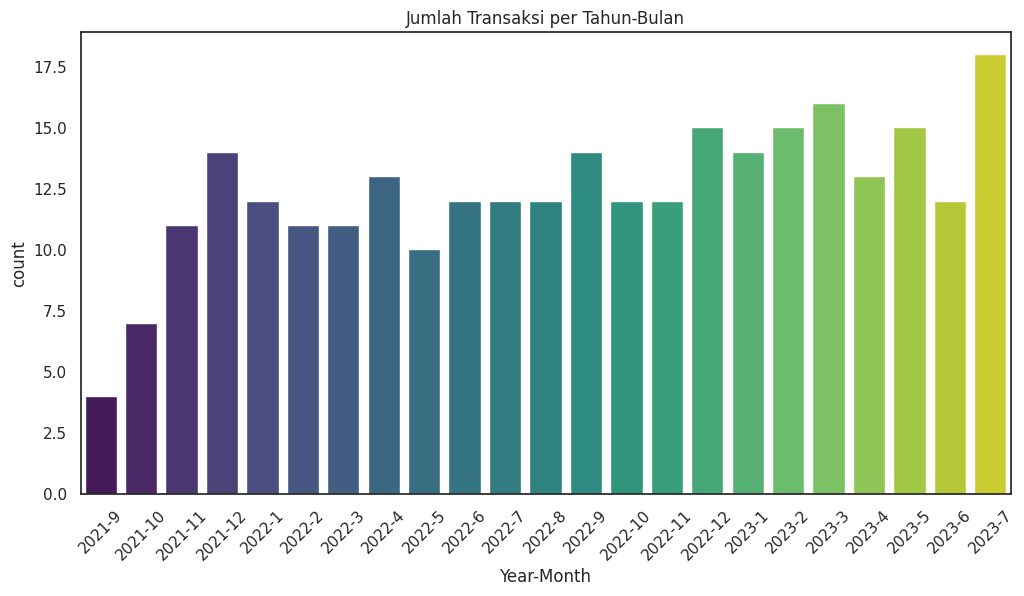

In [ ]:
# 1. Visualisasi Jumlah Transaksi per Tahun-Bulan
plt.figure(figsize=(12, 6))
sns.countplot(x='Year-Month', data=data, palette='viridis')
plt.title('Jumlah Transaksi per Tahun-Bulan')
plt.xticks(rotation=45)
plt.show()